# Informações da questão

In [3]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


# 1. Carregar e explorar os dados
print("=== EXPLORANDO O DATASET ===")
data = load_diabetes()
X = data.data
y = data.target

# 1.2 DataFrame para visualização
df = pd.DataFrame(X, columns=data.feature_names)
df['progressao_diabetes'] = y

print(f"Formato dos dados: {X.shape}")
print(f"Características: {data.feature_names}")
print("\n=== PRIMEIRAS 5 LINHAS DO DATASET ===")
print(df.head())

# explicação das variáveis 's'
print("\n=== EXPLICAÇÃO DAS VARIÁVEIS ===")
print("age: Idade do paciente")
print("sex: Sexo do paciente")
print("bmi: Índice de Massa Corporal (BMI)")
print("bp: Pressão Arterial Média")
print("s1: Colesterol Total (tc)")
print("s2: LDL - Lipoproteínas de Baixa Densidade")
print("s3: HDL - Lipoproteínas de Alta Densidade")
print("s4: TCH - Razão Colesterol Total/HDL")
print("s5: LTG - Triglicerídeos (log)")
print("s6: GLU - Nível de Glicose no Sangue")
print("\nTarget: Medida quantitativa da progressão da diabetes após 1 ano")

print(f"\nDescrição: {data.DESCR[:200]}...")

# 2. Separar dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print(f"\nDados de treino: {X_train.shape}")
print(f"Dados de teste: {X_test.shape}")

=== EXPLORANDO O DATASET ===
Formato dos dados: (442, 10)
Características: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

=== PRIMEIRAS 5 LINHAS DO DATASET ===
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  progressao_diabetes  
0 -0.002592  0.019907 -0.017646                151.0  
1 -0.039493 -0.068332 -0.092204                 75.0  
2 -0.002592  0.002861 -0.025930                141.0  
3  0.034309  0.022688 -0.009362                206.0  
4 -0.002592 -0.031988 -0.046641                135.0  

=== EXPLICAÇÃO DAS VARIÁVEIS ===
age: Id

# Código feito

In [4]:
# Regressão linear e treino:
modelo = LinearRegression()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

In [10]:
print("========== PREVISÕES ==========")
for i in range(5):  # Ter ideia de algumas previsões
    print(f"Previsto: {y_pred[i]:.2f} - Real: {y_test[i]:.2f}")

========== PREVISÕES ==========
Previsto: 138.47 - Real: 219.00
Previsto: 181.10 - Real: 70.00
Previsto: 125.34 - Real: 202.00
Previsto: 292.76 - Real: 230.00
Previsto: 123.88 - Real: 111.00


=== MÉTRICAS DE AVALIAÇÃO ===
Erro Médio Absoluto (MAE): 41.92
Coeficiente de Determinação (R²): 0.48


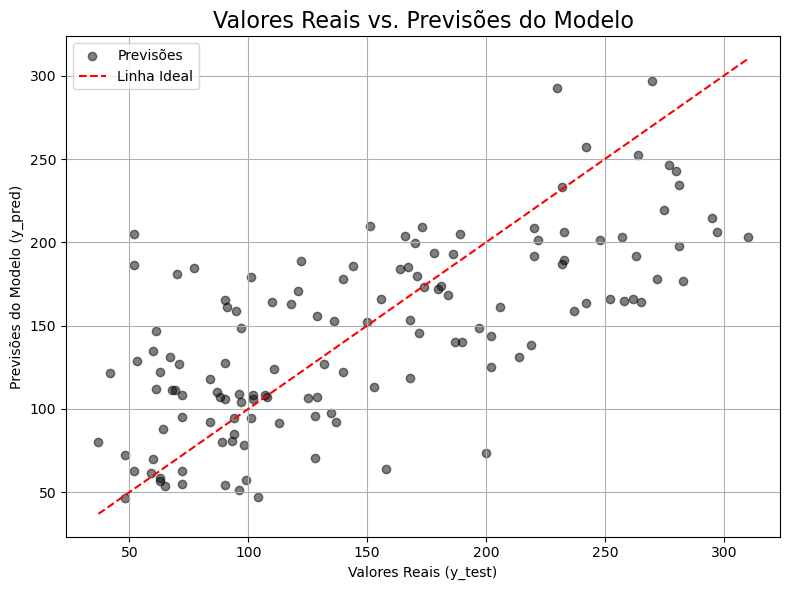

In [6]:
mae = mean_absolute_error(y_test, y_pred)  # Erro Médio Absoluto (MAE) 
r2 = r2_score(y_test, y_pred)  # Clcula o r²

print("=== MÉTRICAS DE AVALIAÇÃO ===")
print(f"Erro Médio Absoluto (MAE): {mae:.2f}")  
print(f"Coeficiente de Determinação (R²): {r2:.2f}")  # 0(pior) a 1(melhor)

# Gráfico: valores reais vs preditos

plt.figure(figsize=(8, 6))  
plt.scatter(y_test, y_pred, alpha=0.5, color='black', label='Previsões')  
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Linha Ideal')  

plt.xlabel('Valores Reais (y_test)')
plt.ylabel('Previsões do Modelo (y_pred)')
plt.title('Valores Reais vs. Previsões do Modelo', fontsize=16)
plt.legend()  
plt.grid(True)  
plt.tight_layout()  
plt.show()  # Exibe o gráfico


# Análise
O MAE (Erro Médio Absoluto) calcula a média do quão distante é o valor da predição em relação ao real. O MAE encontrado foi 41.92, pode-se dizer que o modelo não é tão preciso. Isso pode ser notado graficamente pela distância dos pontos espalhados pelo gráfico em relação a diagonal, ou seja, a distância entre o cruzamento dos valores reais e dos preditos em relação à igualdade deles. Essa métrica de avaliação informa que, em média, as previsões do modelo erram em uma escala de 41.92 pontos para mais ou para menos. Isso significa, em termos práticos que, diante de um valor real 150, o valor predito pode ser de 108 a 192. Dessa forma cabe ao médico decidir se essa margem de erro é aceitável ou não diante do contexto.

O R² (Coeficiente de Determinação) é expresso por um valor de 0 (ineficiente) a 1 (eficiente, taxa de erro nula). Como o valor de R² encontrado é 0.48, isso indica um resultado moderado, que as variáveis fisiológicas têm um poder preditivo, mas que outros 52% da progressão da doença são causados por fatores que não estão no modelo. Esses outros fatores podem ser: genética, quantidade de exercício físico, dieta, entre outros.